In [6]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score
from numpy import where
from collections import Counter
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks

   length_51  length_52  length_53  length_54  length_55  length_56  \
0   0.000152   0.000081   0.000087   0.000092   0.000099   0.000125   
1   0.006256   0.006413   0.006512   0.006469   0.006810   0.007070   
2   0.003783   0.003886   0.004063   0.004237   0.004481   0.004832   
3   0.004635   0.004471   0.004383   0.004829   0.004920   0.005056   
4   0.011315   0.010045   0.009795   0.009906   0.010630   0.011467   

   length_57  length_58  length_59  length_60  ...  length_392  length_393  \
0   0.000122   0.000115   0.000151   0.000167  ...    0.007396    0.007193   
1   0.007748   0.008088   0.008671   0.008835  ...    0.017830    0.017033   
2   0.004960   0.005605   0.005919   0.006480  ...    0.010957    0.010481   
3   0.005475   0.006158   0.007174   0.007697  ...    0.010032    0.008933   
4   0.013024   0.014853   0.016874   0.017501  ...    0.009118    0.008535   

   length_394  length_395  length_396  length_397  length_398  length_399  \
0    0.006973    0.006481  

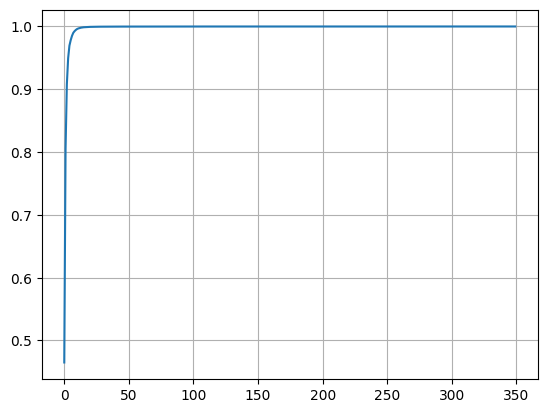

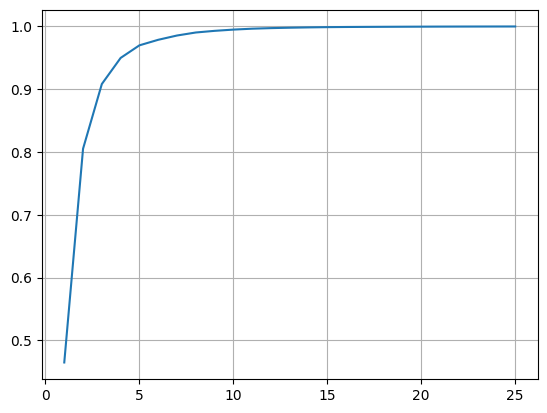

350
['length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length_126', 'length_127', 'length_128', 'len

c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
Fitting estimator with 336 features.
Fitting estimator with 335 features.
Fitting estimator with 334 features.
Fitting estimator with 333 features.


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 324 features.
Fitting estimator with 323 features.
Fitting estimator with 322 features.
Fitting estimator with 321 features.
Fitting estimator with 320 features.
Fitting estimator with 319 features.
Fitting estimator with 318 features.
Fitting estimator with 317 features.


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 316 features.
Fitting estimator with 315 features.
Fitting estimator with 314 features.
Fitting estimator with 313 features.
Fitting estimator with 312 features.
Fitting estimator with 311 features.
Fitting estimator with 310 features.
Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
Fitting estimator with 276 features.
Fitting estimator with 275 features.
Fitting estimator with 274 features.
Fitting estimator with 273 features.
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
F

c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
F

In [7]:

%run HealthyvsCancer.ipynb


In [10]:

train_x = xvals_train_filtered
train_y = yvals_train_binary


test_y = yvals_test.map({'cancer': 1, 'healthy': 0})
test_x = xvals_test_filtered

class_counts = train_y.value_counts()


In [11]:
# Define pipeline for SMOTE 
smote_pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.5)),  # Adjust as needed
    ('classifier', KNeighborsClassifier())
])

# Define parameter grids for SMOTE 
smote_param_grid = {
    'sampling__k_neighbors': [3, 5, 7],
    'classifier__n_neighbors': range(2, 30)
}

# Perform grid search for SMOTE 
smote_grid_search = GridSearchCV(smote_pipeline, smote_param_grid, cv=5, scoring='recall')
smote_grid_search.fit(train_x, train_y)

best_params_smote = smote_grid_search.best_params_
print(best_params_smote)

{'classifier__n_neighbors': 3, 'sampling__k_neighbors': 3}


In [12]:
smote = SMOTE(k_neighbors=best_params_smote['sampling__k_neighbors'], sampling_strategy=0.5)
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
class_counts = train_y_smote.value_counts()
print(class_counts)
print(type(train_y_smote))

class_label
1    2133
0    1066
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [13]:
# Initialize Near-Miss with a range of n_neighbors values
near_miss = NearMiss(sampling_strategy='auto', version=1)
param_grid = {'sampling__n_neighbors': [1, 3, 5, 7]}

# Create a pipeline with Near-Miss and KNN classifier
pipeline = Pipeline([
    ('sampling', near_miss),
    ('classifier', KNeighborsClassifier())
])

# Perform grid search
nm_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
nm_grid_search.fit(train_x_smote, train_y_smote)

best_params_near_miss = nm_grid_search.best_params_
print(best_params_near_miss)

{'sampling__n_neighbors': 5}


In [14]:
# Initialize ENN
enn = EditedNearestNeighbours()

# Define parameter grid
param_grid_enn = {'sampling__n_neighbors': [1, 3, 5, 7], 
                  'classifier__n_neighbors': [1, 3, 5, 7]}

# Create a pipeline with ENN and KNN classifier
pipeline_enn = Pipeline([
    ('sampling', enn),
    ('classifier', KNeighborsClassifier())
])

# Perform grid search
grid_search_enn = GridSearchCV(pipeline_enn, param_grid_enn, cv=5, scoring='recall')
grid_search_enn.fit(train_x_smote, train_y_smote)

# Get the best parameters
best_params_enn = grid_search_enn.best_params_
print(best_params_enn)

{'classifier__n_neighbors': 3, 'sampling__n_neighbors': 1}


In [15]:
near_miss = NearMiss(sampling_strategy='auto', version=1, n_neighbors= best_params_near_miss['sampling__n_neighbors'])
tomek_links = TomekLinks(sampling_strategy='auto')
enn = EditedNearestNeighbours(n_neighbors= best_params_enn['sampling__n_neighbors'], )

custom_undersampler_pipeline = Pipeline([
    ('near_miss', near_miss),
    ('tomek_links', tomek_links),
    ('enn', enn)
])

In [16]:
train_x, train_y = custom_undersampler_pipeline.fit_resample(train_x_smote, train_y_smote)

counts = train_y.value_counts()

print(counts)

class_label
1    1049
0    1027
Name: count, dtype: int64


In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_params_smote['classifier__n_neighbors'])
knn_classifier.fit(train_x, train_y)
y_pred = knn_classifier.predict(test_x)
print(classification_report(test_y, y_pred, target_names= ["Healthy", "Cancer"]))

              precision    recall  f1-score   support

     Healthy       0.09      0.49      0.16        41
      Cancer       0.97      0.81      0.88       993

    accuracy                           0.79      1034
   macro avg       0.53      0.65      0.52      1034
weighted avg       0.94      0.79      0.85      1034



In [18]:
#hyper parameter tuning
train_recall_scores = {}
test_recall_scores = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(train_x, train_y)
    
    train_recall = recall_score(train_y, knn.predict(train_x))
    test_recall = recall_score(test_y, knn.predict(test_x))

    train_recall_scores[neighbor] = train_recall
    test_recall_scores[neighbor] = test_recall

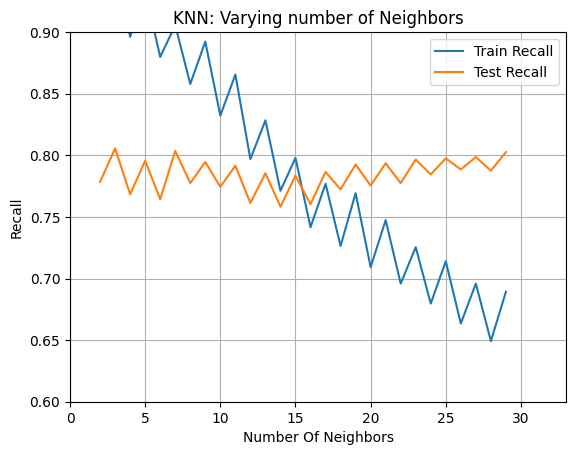

In [20]:
plt.plot(n_neighbors, train_recall_scores.values(), label="Train Recall")
plt.plot(n_neighbors, test_recall_scores.values(), label="Test Recall")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Recall")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [21]:
best_neighbor_manual = max(test_recall_scores, key=test_recall_scores.get)
print("Best n_neighbors (manual):", best_neighbor_manual)

Best n_neighbors (manual): 3


In [22]:
# Using GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1, scoring='recall')
knn_cv.fit(train_x, train_y)
print("Best parameters (GridSearchCV):", knn_cv.best_params_)
best_k = knn_cv.best_params_['n_neighbors']

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters (GridSearchCV): {'n_neighbors': 3}


In [23]:
knn=KNeighborsClassifier(n_neighbors= best_k)
knn.fit(train_x, train_y)
y_pred=knn.predict(test_x)
recall = recall_score(test_y, y_pred)
print("Recall score for testing dataset after tuning: {:.2f}".format(recall))

Recall score for testing dataset after tuning: 0.81


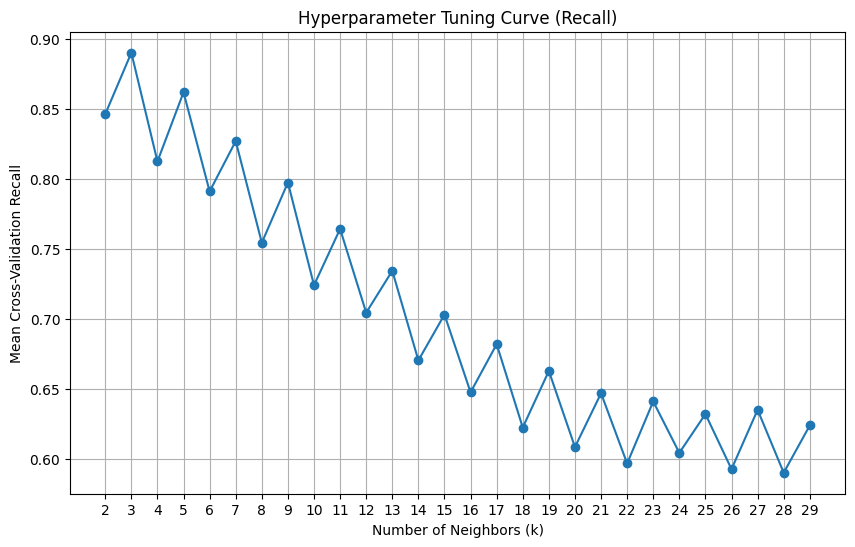

In [24]:
recalls = knn_cv.cv_results_['mean_test_score']  # Access mean test scores (recall)
params = knn_cv.cv_results_['param_n_neighbors'].data.astype(int)

plt.figure(figsize=(10, 6))
plt.plot(params, recalls, marker='o', linestyle='-')
plt.title('Hyperparameter Tuning Curve (Recall)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Recall')
plt.xticks(np.arange(2, 30, step=1))  # Adjust the range of x-axis ticks as needed
plt.grid(True)
plt.show()

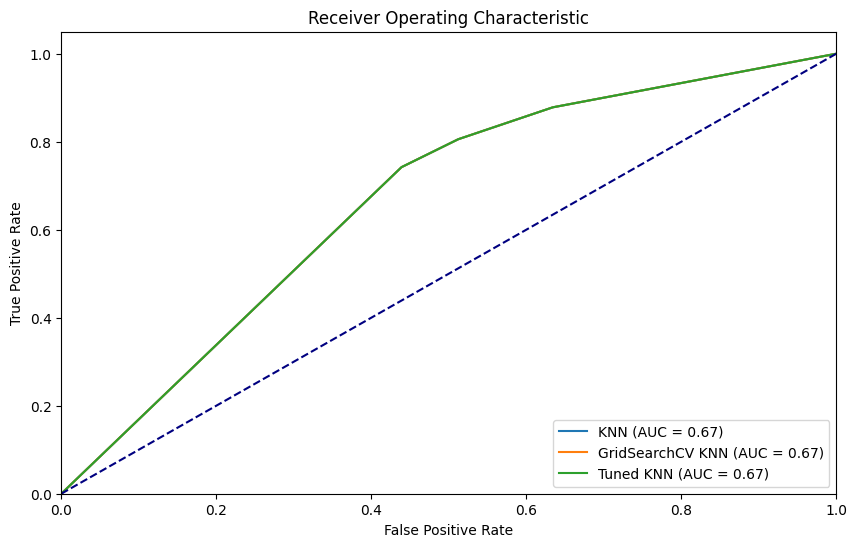

In [28]:
from sklearn.metrics import roc_curve, auc

models = [knn_classifier, knn_cv, knn]
model_names = ['KNN', 'GridSearchCV KNN', 'Tuned KNN']

plt.figure(figsize=(10, 6))

# For each model
for model, name in zip(models, model_names):
    try:
        # Make predictions (proba returns the probability of the sample for each class in the model)
        y_pred_proba = model.predict_proba(test_x)[:, 1]

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(test_y, y_pred_proba, pos_label=1)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    except Exception as e:
        print(f"Error while processing {name}: {e}")

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

